In [0]:
import numpy as np
import matplotlib.pyplot as plt

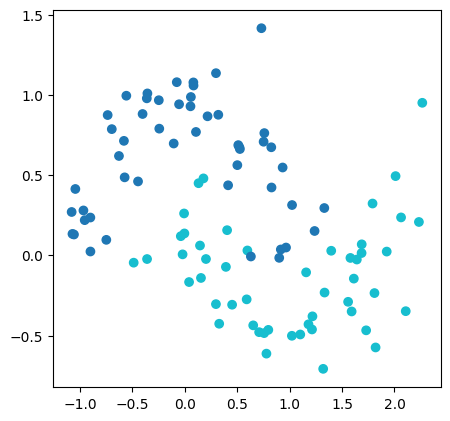

In [121]:
from sklearn.datasets import make_classification, make_moons

X, y = make_moons(n_samples=100, noise=.2)
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.show()

In [123]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

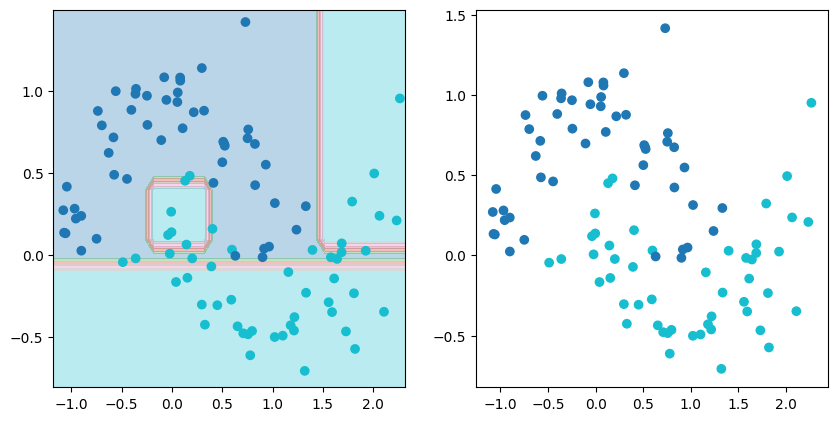

In [125]:
h = .1
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=.3, cmap='tab10')#, levels=[0])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.show()

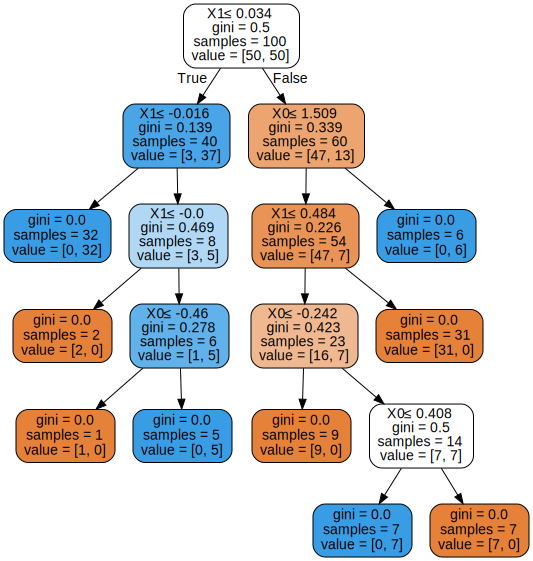

In [126]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier, out_file=None, filled=True,
                           rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

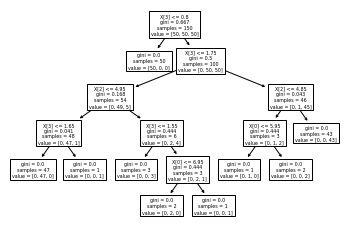

In [108]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

clf = DecisionTreeClassifier()
clf.fit(X, y)

from sklearn.tree import plot_tree
iris = load_iris()
plot_tree(clf.fit(iris.data, iris.target)) ;

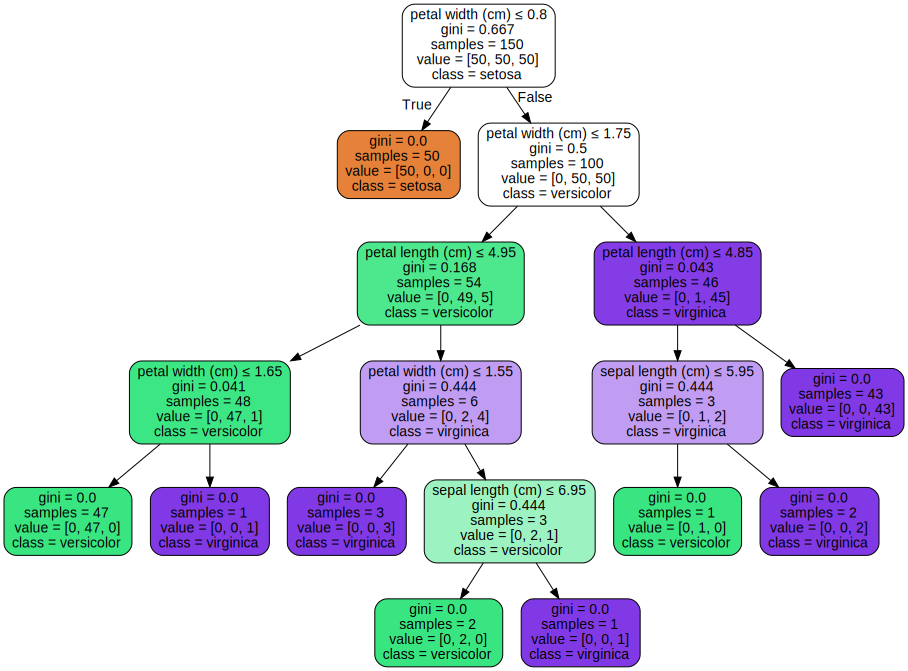

In [109]:
dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, 
                           class_names=iris.target_names, filled=True,
                           rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.render("iris")
graph 

Titanic

In [0]:
data_urls = ["""https://cl.lingfil.uu.se/~frewa417/train.csv""", """https://cl.lingfil.uu.se/~frewa417/test.csv"""]

fn = [url.split("/")[-1] for url in data_urls]

import urllib.request
for url, f in zip(data_urls, fn):
  urllib.request.urlretrieve(url, f)

In [111]:
import csv
with open('train.csv') as csvfile:
  X = list()
  y = list()
  names = list()
  feature_idx = [2, 4, 5, 6]
  for n, row in enumerate(csv.reader(csvfile)):
    if n == 0:
      all_feature_names = row
      feature_names = [row[i] for i in feature_idx]
    else:
      try:
        v = [row[i] for i in feature_idx]
        for i in range(len(v)):
          if v[i] == 'male':
            v[i] = 0
          elif v[i] == 'female':
            v[i] = 1
          else:
            v[i] = float(v[i])
        X.append(v)
        y.append(float(row[1]))
        names.append(row[3])
      except:
        pass
assert len(X) == len(y)
assert len(X) == len(names)
X = np.asarray(X)
y = np.asarray(y)
assert X.shape[0] == y.shape[0]
assert feature_names[1] == 'Sex'
feature_names[1] = 'IsFemale'
print("Found %i data point for features %s" % (X.shape[0], feature_names))

Found 714 data point for features ['Pclass', 'IsFemale', 'Age', 'SibSp']


In [112]:
print(all_feature_names)
print(row)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['891', '0', '3', 'Dooley, Mr. Patrick', 'male', '32', '0', '0', '370376', '7.75', '', 'Q']


In [113]:
X[:10, :]

array([[ 3.,  0., 22.,  1.],
       [ 1.,  1., 38.,  1.],
       [ 3.,  1., 26.,  0.],
       [ 1.,  1., 35.,  1.],
       [ 3.,  0., 35.,  0.],
       [ 1.,  0., 54.,  0.],
       [ 3.,  0.,  2.,  3.],
       [ 3.,  1., 27.,  0.],
       [ 2.,  1., 14.,  1.],
       [ 3.,  1.,  4.,  1.]])

In [114]:
y[:10]

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1.])

In [116]:
u = y[X[:, 1]==0]
np.sum(u)/len(u)

0.2052980132450331

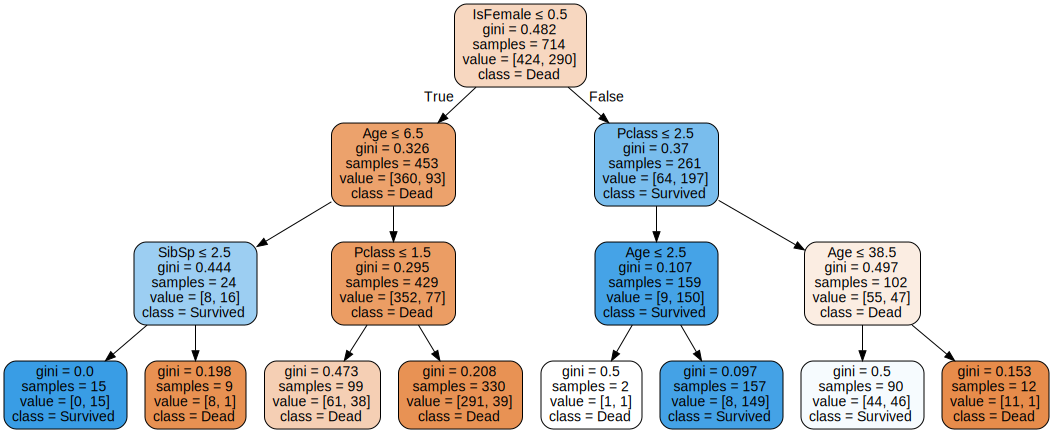

In [118]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names, 
                           class_names=['Dead', 'Survived'], filled=True,
                           rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.render("iris")
graph 